In [2]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv

--2025-03-20 21:56:25--  https://lazyprogrammer.me/course_files/airline_passengers.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 2606:4700:3031::6815:17d2, 2606:4700:3030::ac43:d5a6, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|2606:4700:3031::6815:17d2|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2036 (2.0K) [text/csv]
Saving to: ‘airline_passengers.csv’

airline_passengers. 100%[===================>]   1.99K  --.-KB/s    in 0.001s  

2025-03-20 21:56:25 (3.77 MB/s) - ‘airline_passengers.csv’ saved [2036/2036]



* wget: a command-line utility used for downloading files from the web
* -nc: avoid re-downloading files that already exist.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import boxcox

In [4]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
#index_col='Month': Use the 'Month' column as the index of the DataFrame.
#parse_dates=True : Convert the values in the 'Month' column into datetime objects.

In [5]:
print(df.dtypes)

Passengers    int64
dtype: object


In [7]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [9]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Visualize effects of different transformations

<Axes: xlabel='Month'>

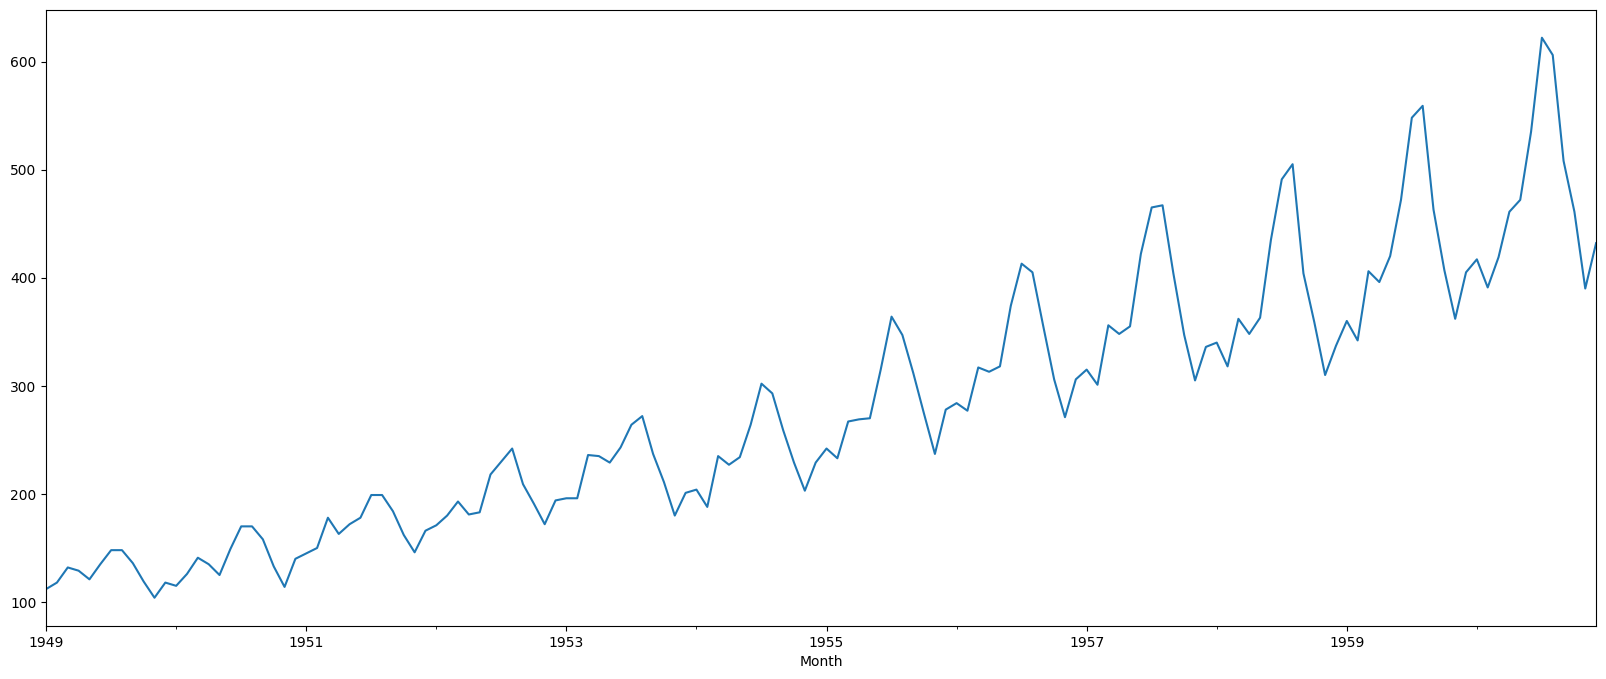

In [11]:
df['Passengers'].plot(figsize=(20, 8))

Some noticeable characteristics of this time series: 
* trend,
* seasonality,
* amplitude of the repetitive pattern increases over time.

In [12]:
df['SqrtPassengers'] = np.sqrt(df['Passengers'])

<Axes: xlabel='Month'>

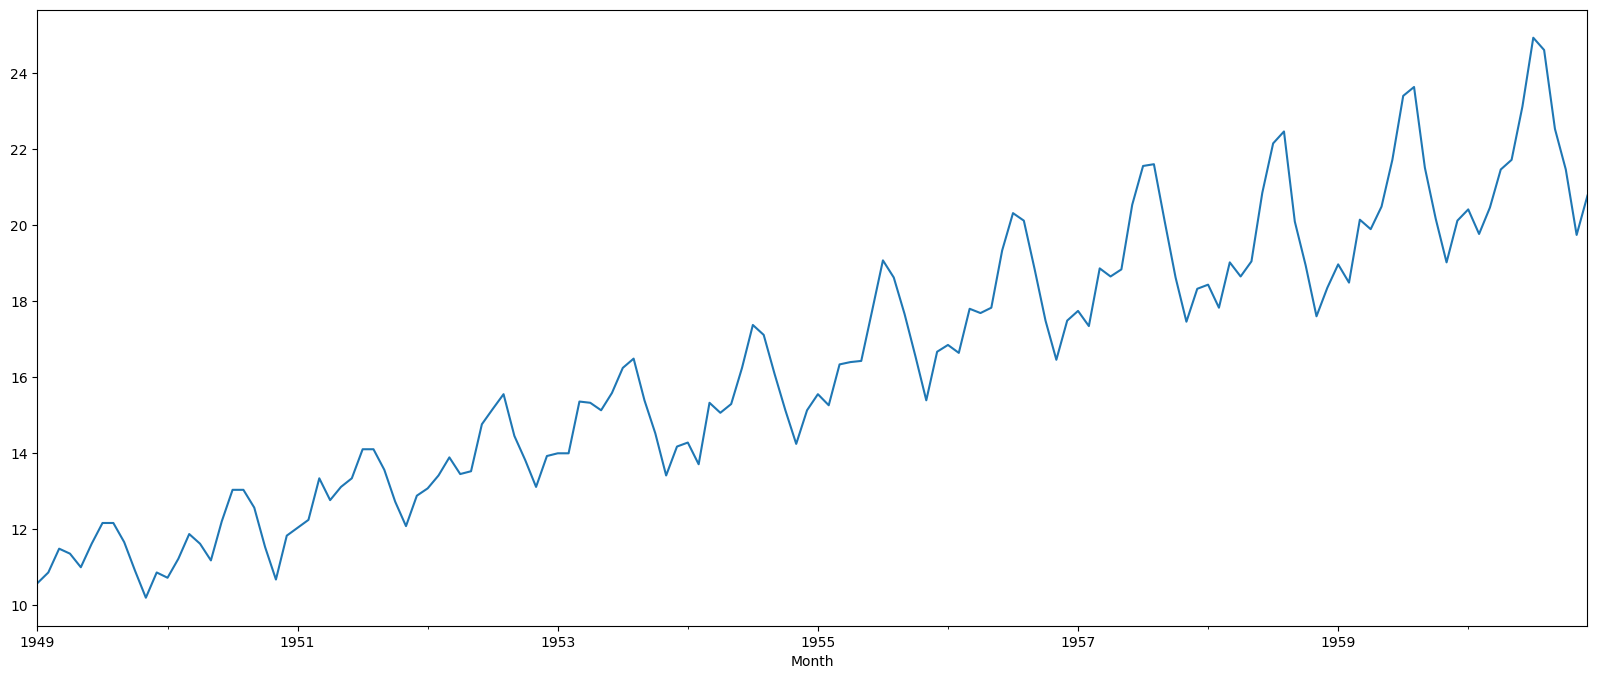

In [13]:
df['SqrtPassengers'].plot(figsize=(20, 8))

In [14]:
df['LogPassengers'] = np.log(df['Passengers'])

<Axes: xlabel='Month'>

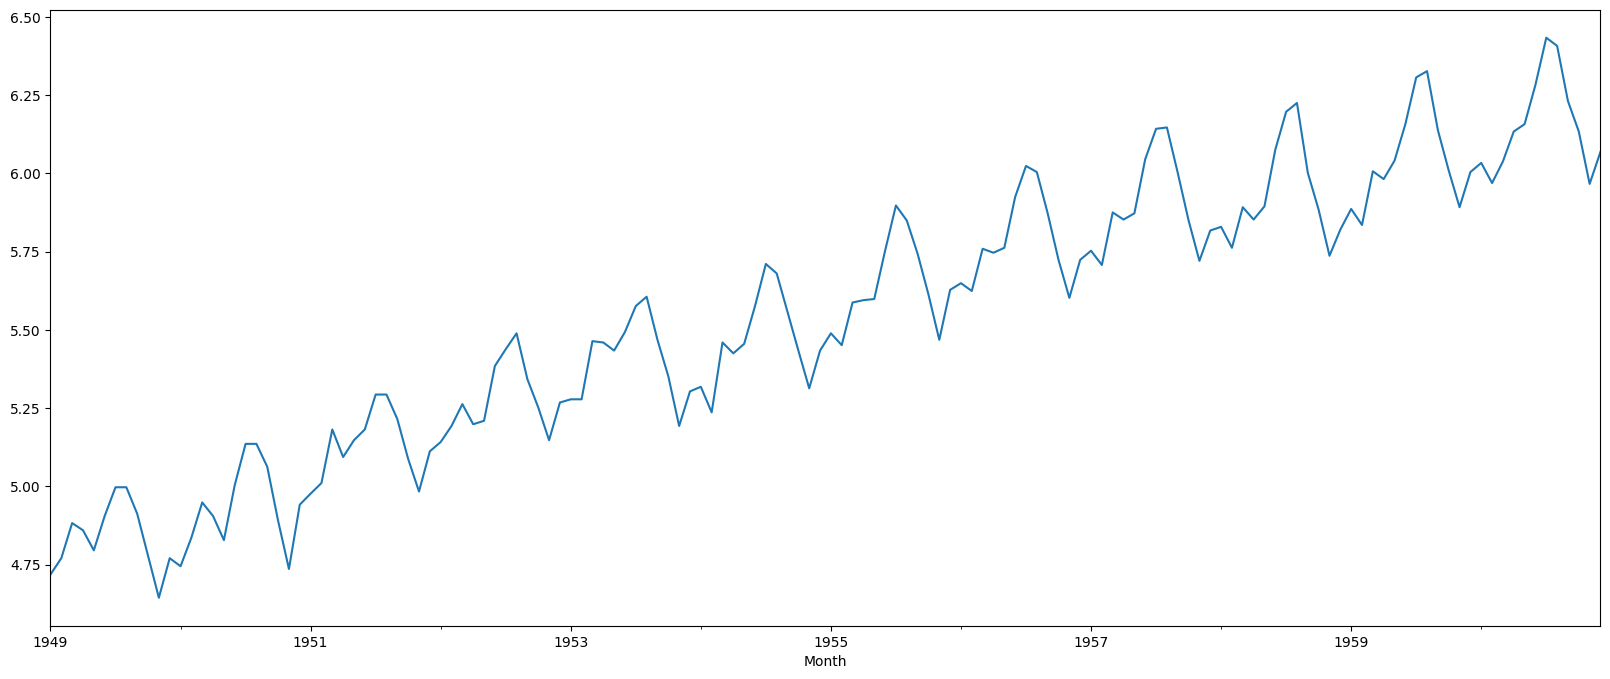

In [15]:
df['LogPassengers'].plot(figsize=(20, 8))

Compared to the square root transform, log transform makes the amplitude more uniform in time, which is desirable.

In [16]:
data, lam = boxcox(df['Passengers'])

In [17]:
help(boxcox)

Help on function boxcox in module scipy.stats._morestats:

boxcox(x, lmbda=None, alpha=None, optimizer=None)
    Return a dataset transformed by a Box-Cox power transformation.

    Parameters
    ----------
    x : ndarray
        Input array to be transformed.

        If `lmbda` is not None, this is an alias of
        `scipy.special.boxcox`.
        Returns nan if ``x < 0``; returns -inf if ``x == 0 and lmbda < 0``.

        If `lmbda` is None, array must be positive, 1-dimensional, and
        non-constant.

    lmbda : scalar, optional
        If `lmbda` is None (default), find the value of `lmbda` that maximizes
        the log-likelihood function and return it as the second output
        argument.

        If `lmbda` is not None, do the transformation for that value.

    alpha : float, optional
        If `lmbda` is None and `alpha` is not None (default), return the
        ``100 * (1-alpha)%`` confidence  interval for `lmbda` as the third
        output argument. Must be bet

In [18]:
lam

np.float64(0.14802254856840585)

The optimal lambda in this case(0.15) shows the Box-Cox transform is in between sqrt(0.5) and log(0) transform. The plot below validates it.

<Axes: xlabel='Month'>

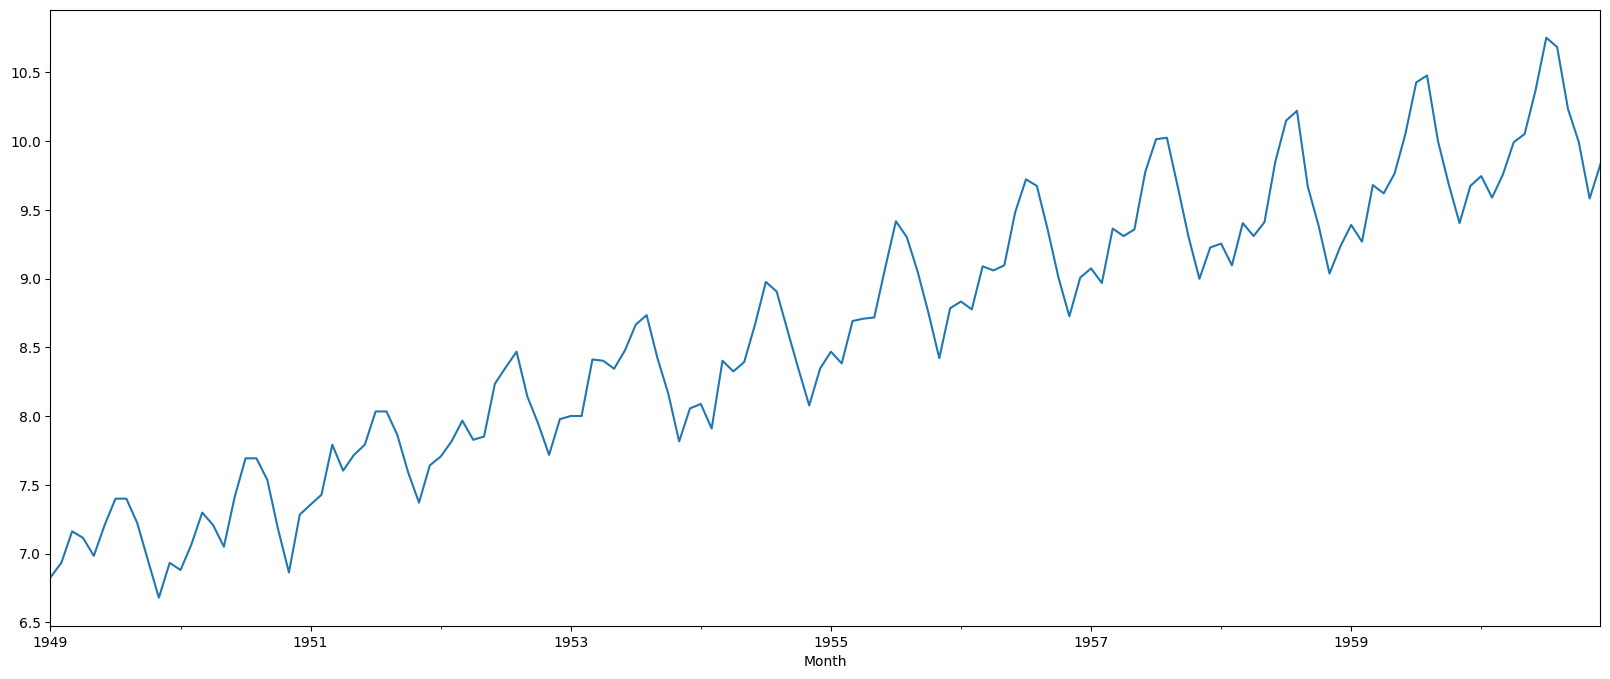

In [19]:
df['BoxCoxPassengers'] = data
df['BoxCoxPassengers'].plot(figsize=(20,8))

In [20]:
df.head()

,Passengers,SqrtPassengers,LogPassengers,BoxCoxPassengers
Month,,,,
1949-01-01,112,10.583005,4.718499,6.827488
1949-02-01,118,10.862780,4.770685,6.932820
1949-03-01,132,11.489125,4.882802,7.161889
1949-04-01,129,11.357817,4.859812,7.114609
1949-05-01,121,11.000000,4.795791,6.983785


## Visualize data in the form of histogram
We can see that, by transforming skewed data, the Box-Cox method improves normality. 

*Remark: histogram in this case does not indicate "distribution" of the data, since the time series is non-stationary, meaning its distribution is dynamic and changing in time.*

<Axes: >

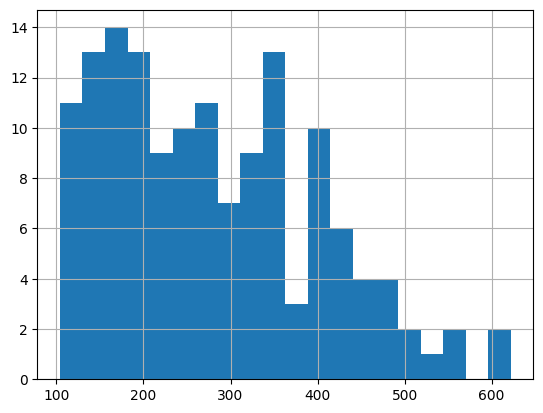

In [22]:
df['Passengers'].hist(bins=20) #"bins=20" divides the x-data into 20 equal-width intervals.

Most of the values are concentrated in the lower hundreds.

<Axes: >

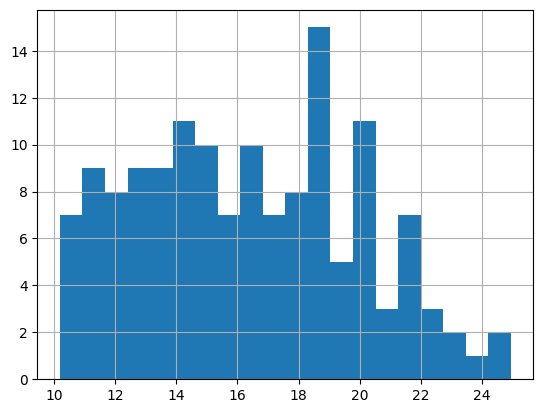

In [23]:
df['SqrtPassengers'].hist(bins=20)

<Axes: >

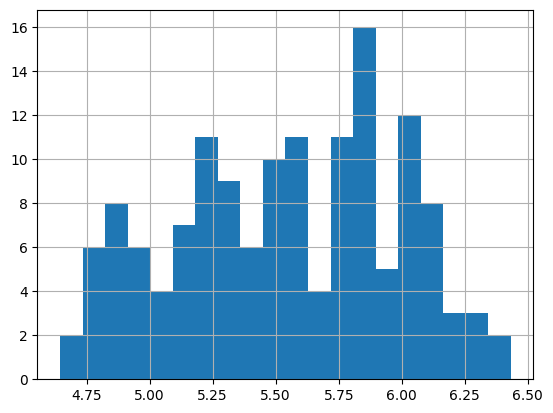

In [24]:
df['LogPassengers'].hist(bins=20)

<Axes: >

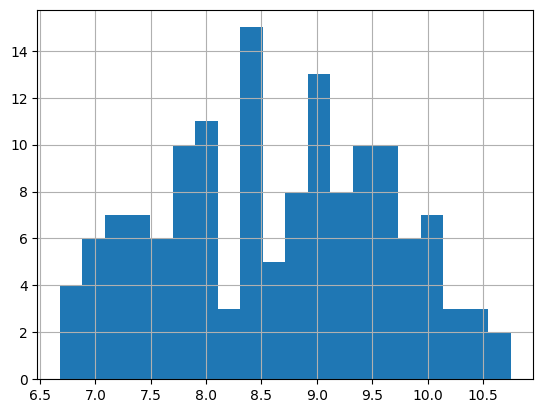

In [25]:
df['BoxCoxPassengers'].hist(bins=20)

The distribution is more evenly spread out in the center rather than skewed to one side.